# Loading image and libraries

In [90]:
!pip install scipy

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, gaussian_filter
from PIL import Image
import cv2  # F√ºr Canny (muss installiert sein)

# Bild laden
bildpfad = "../images/shapes.png"
bild = Image.open(bildpfad).convert('L')
bild_array = np.array(bild)

# Overview

## Filter
Using convolution with a filter on a grayscale image, you can detect edges in an image. The value which is displayed in a grayscale image is the intensity (Helligkeit).
- Sobel ‚Üí first derivative of the image (detects edges; partial derivative in x and y direction ‚Üí sobel_x filter for vertical edges and sobel_y for horizontal edges)
- LaPlace ‚Üí second derivative of the image (detects strong changes in intensity ‚Üí often edges or corners)
- Gaussian ‚Üí smoothing with a gaussian function

## Filter combinations

- Laplacian of Gaussian (LoG) = Laplace after Gauss
- Canny =
  1. smoothing (Gaussian)
  2. calculate gradients (Sobel Filter)
  3. Non-Maximum Suppression ‚Üí thins out edges
  4. Hysteresis threshold ‚Üí to select strong / weak edges


<a>
  <img src="../images/Effect-of-three-different-edge-detection-filters-Laplacian-Canny-and-Sobel-filters.png" alt="Pinhole camera" width="480" style="background-color: white;padding: 10px;">
</a>

<a href="https://www.youtube.com/watch?v=uNP6ZwQ3r6A" target="_blank">
<img src="https://img.youtube.com/vi/uNP6ZwQ3r6A/maxresdefault.jpg" alt="Simple Stereo" width="500">
</a>

# Sobel (Derivative of Gaussian with $\sigma = 1$)

<a>
  <img src="../images/Sobel_operator.webp" alt="Pinhole camera" width="480" style="background-color: white;padding: 10px;">
</a>

Der Sobel-Operator ist ein Kantendetektor aus der Bildverarbeitung. Er berechnet die ungef√§hre Ableitung (Gradient) eines Bildes in x- und y-Richtung. So lassen sich Kanten (pl√∂tzliche Helligkeitswechsel) erkennen. Da das Ergebnis jedoch empfindlich gegen√ºber Rauschen ist, wird noch eine leichte Gl√§ttung hinzugef√ºgt. 

>Der Sobelfilter ist also eine Kombination aus:
>- Approximation der ersten Ableitung
>- Leichter Gl√§ttung

Die erste Ableitung berechnet sich aus:
$$f‚Äô(x)=\frac{d f(x)}{dx}$$

Im Bildverarbeitungskontext arbeitest du aber mit diskreten Pixeln, also kannst du die Ableitung nur n√§herungsweise berechnen.
$$f‚Äô(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$

Wenn wir h = 1 setzen (Abstand zwischen den Pixeln), vereinfacht sich das zu:

$$f‚Äô(x) \approx \frac{f(x+1) - f(x-1)}{2}$$

Das ist die zentrale Differenzenmethode. In Kernel-Form sieht das so aus:
$$\begin{bmatrix}
-0.5  & 0 & 0.5\\
\end{bmatrix}$$

‚û°Ô∏è Die Sobel-Operatoren sind Faltungsmatrizen (Kernels), die √ºber das Bild gelegt werden:

Sobel X (horizontale Kanten):

$$G_x =
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{bmatrix}$$

Sobel Y (vertikale Kanten):

$$G_y =
\begin{bmatrix}
-1 & -2 & -1 \\
0 &  0 &  0 \\
1 &  2 &  1 \\
\end{bmatrix}$$

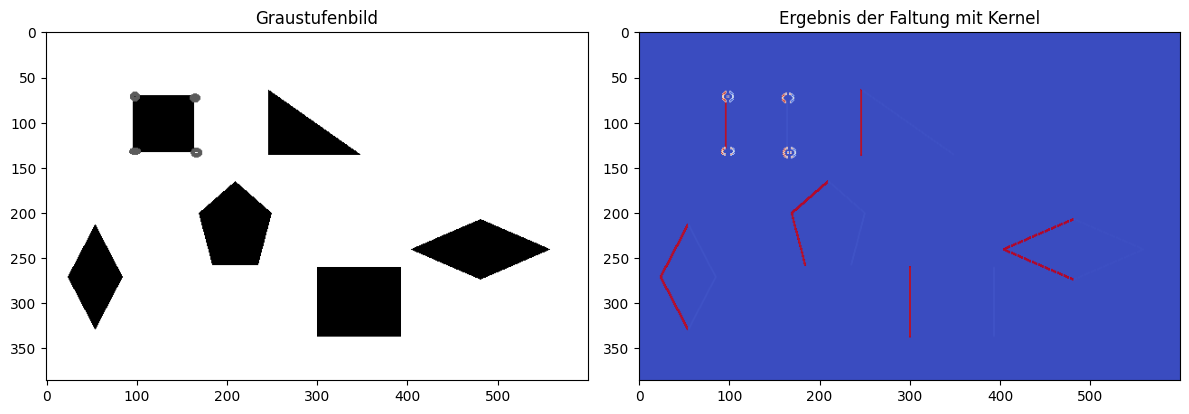

In [92]:
# Filter definieren
# Hier verwenden wir den klassischen Sobel X Kernel
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# Filter anwenden
ergebnis = convolve(bild_array, kernel)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(bild_array, cmap='gray')
axs[0].set_title("Graustufenbild")

axs[1].imshow(ergebnis, cmap='coolwarm')
axs[1].set_title(f"Ergebnis der Faltung mit Kernel")

plt.tight_layout()
plt.show()

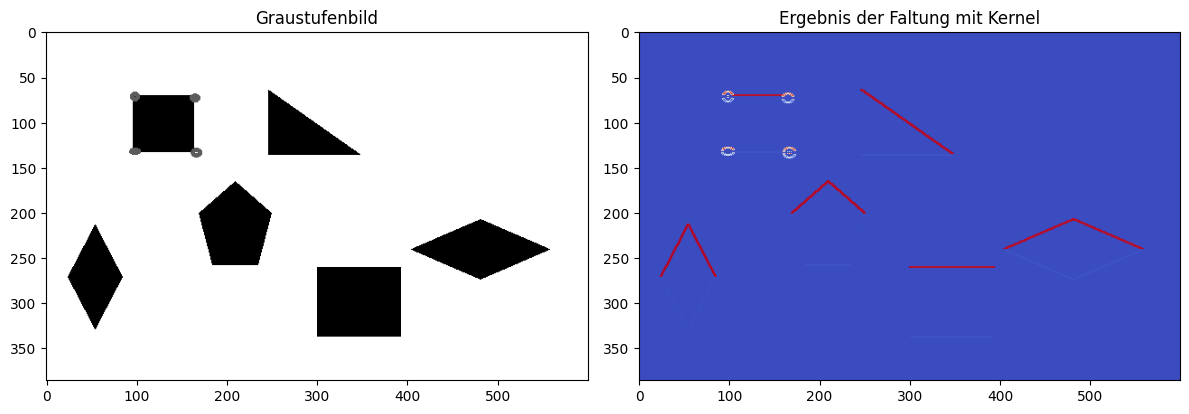

In [93]:
# Filter definieren
# Hier verwenden wir den klassischen Sobel Y Kernel
kernel = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
# Filter anwenden
ergebnis = convolve(bild_array, kernel)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(bild_array, cmap='gray')
axs[0].set_title("Graustufenbild")

axs[1].imshow(ergebnis, cmap='coolwarm')
axs[1].set_title(f"Ergebnis der Faltung mit Kernel")

plt.tight_layout()
plt.show()

Nachdem das Graustufenbild mit Sobel einmal in X-Richtung und einmal in Y-Richtung gefaltet wurde, werden die Ergebnisse addiert.

$\text{Magnitude} = \sqrt{(S_x)^2 + (S_y)^2}$

Der Sobel-Magnitude-Operator l√§sst sich nicht als einzelner Kernel darstellen, weil er die Kombination aus zwei Kerneln (f√ºr x- und y-Richtung) ist und erst nach der Faltung mit beiden Kerneln die Magnitude berechnet wird.

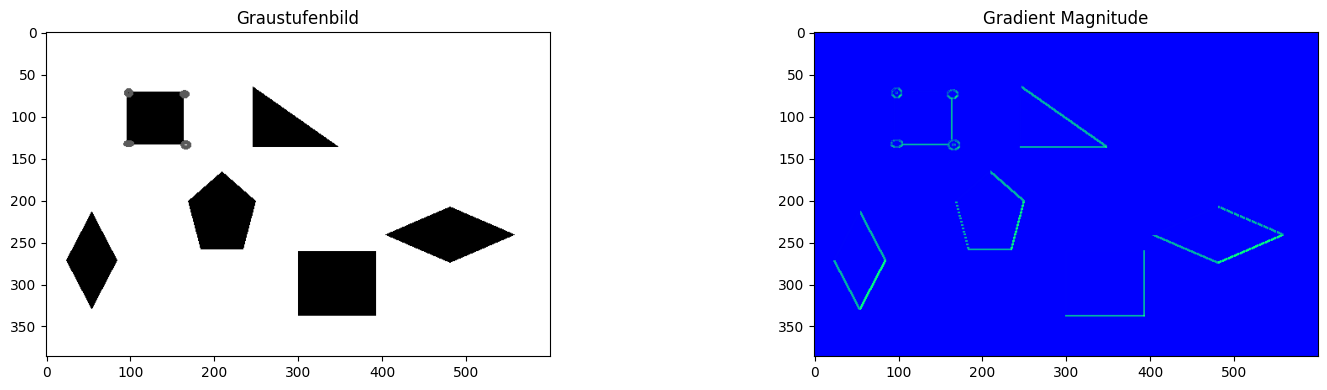

In [94]:
from scipy import ndimage

# Sobel-Operator anwenden
sobel_x = ndimage.sobel(bild_array, axis=1)
sobel_y = ndimage.sobel(bild_array, axis=0)
sobel_magnitude = np.hypot(sobel_x, sobel_y)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].imshow(bild_array, cmap='gray')
axs[0].set_title("Graustufenbild")

axs[1].imshow(sobel_magnitude, cmap='winter')
axs[1].set_title("Gradient Magnitude")

plt.tight_layout()
plt.show()

Grunds√§tzlich ist der Sobel-Operator ein spezieller Kantendetektor, der als diskreter Filter (Kernel) definiert ist und typischerweise auf Bilddaten oder diskrete 2D-Daten angewendet wird.

**Kann man den Sobel-Operator auch auf eine kontinuierliche Funktion anwenden?**

Nicht direkt analytisch, weil der Sobel-Operator auf der diskreten Approximation der Ableitung basiert. Aber was du machen kannst (und was oft gemacht wird):

‚úÖ Du wertest deine Funktion diskret auf einem Gitter aus (so wie du es mit deiner Sinus-Cosinus-Funktion gemacht hast)

‚úÖ Dann kannst du den Sobel-Operator ganz genauso wie auf ein Bild anwenden, weil du ja ein 2D-Array hast

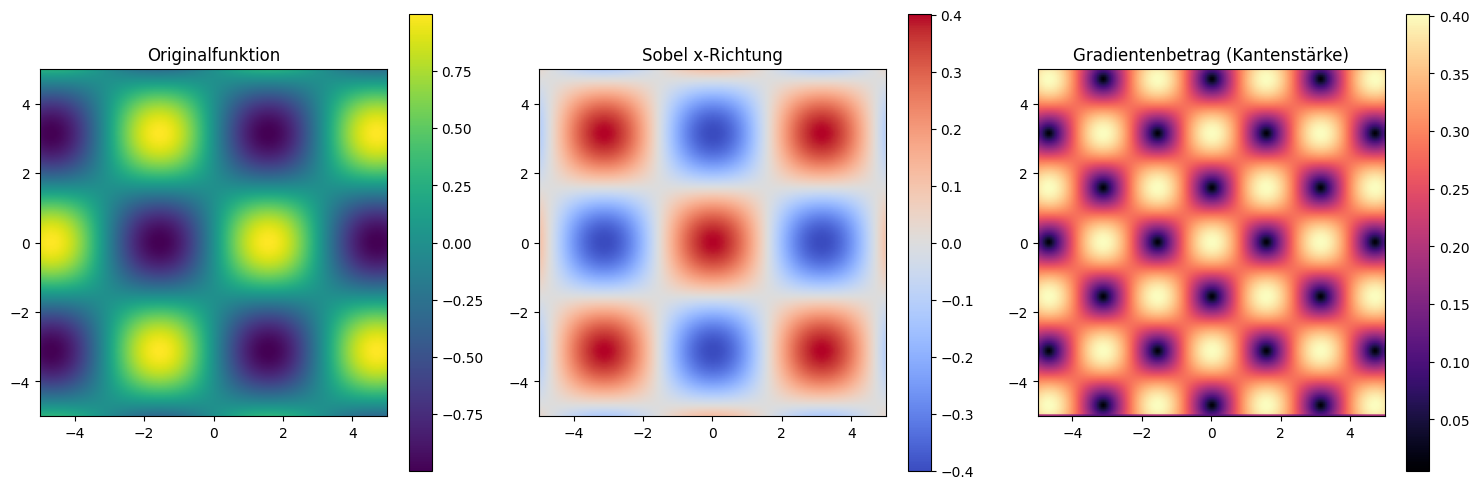

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel

# Gitter erzeugen
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

# Funktion definieren
Z = np.sin(X) * np.cos(Y)

# Sobel-Operator anwenden (Ableitungen in x- und y-Richtung)
sobel_x = sobel(Z, axis=1)
sobel_y = sobel(Z, axis=0)
gradient_magnitude = np.hypot(sobel_x, sobel_y)

# Plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

im0 = axs[0].imshow(Z, extent=(-5, 5, -5, 5), origin='lower', cmap='viridis')
axs[0].set_title("Originalfunktion")
plt.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(sobel_x, extent=(-5, 5, -5, 5), origin='lower', cmap='coolwarm')
axs[1].set_title("Sobel x-Richtung")
plt.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(gradient_magnitude, extent=(-5, 5, -5, 5), origin='lower', cmap='magma')
axs[2].set_title("Gradientenbetrag (Kantenst√§rke)")
plt.colorbar(im2, ax=axs[2])

plt.tight_layout()
plt.show()

# LaPlace

Der Laplace-Operator ist definiert als die Summe der zweiten Ableitungen einer Funktion:

- F√ºr eine Funktion f(x, y) im 2D-Raum ist:
$$\Delta f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

- In 3D:
$$\Delta f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} + \frac{\partial^2 f}{\partial z^2}$$

---
‚úÖ Der Gradient einer Funktion liefert einen Vektor, der die Richtung und St√§rke des gr√∂√üten Anstiegs beschreibt. Das ist die erste Ableitung.

‚úÖ Der Laplace-Operator ist die Summe der zweiten partiellen Ableitungen, also ein Ma√ü daf√ºr, wie stark die Funktion in alle Richtungen ‚Äúgekr√ºmmt‚Äù ist.

$$\Delta f = \nabla \cdot \nabla f = \text{div}(\text{grad}(f))$$

Das hei√üt:
- Du bildest zuerst den Gradient (erste Ableitungen ‚Üí Vektor).
- Dann nimmst du die Divergenz dieses Gradienten (Summe der partiellen Ableitungen der Gradienten-Komponenten).

Fazit:
Der Laplace-Operator ist also nicht der ‚Äúzweite Gradient‚Äù, sondern die Divergenz des Gradienten, was die Summe der zweiten Ableitungen ergibt.

---- 

In der Bildverarbeitung wird der diskrete Laplace-Operator oft als Filter-Maske angewandt, um Kanten oder schnelle Helligkeitswechsel zu erkennen. 

**Herleitung**
F√ºr ein Bild ben√∂tigen wir den LaPlace Operator im 2D-Raum. 

1. Die zweite Ableitung in x-Richtung (diskret) lautet:

    $\frac{\partial^2 f}{\partial x^2} \approx f(x+1, y) - 2f(x, y) + f(x-1, y)$

2. Genauso in y-Richtung:

    $\frac{\partial^2 f}{\partial y^2} \approx f(x, y+1) - 2f(x, y) + f(x, y-1)$

3. Wenn du das zusammenfasst, erh√§ltst du den klassischen 4-neighbourhood 2D-Laplace-Kernel, bei dem nur die direkten Nachbarn ber√ºcksichtigt werden: 
$$\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}$$

4. Um resistenter gegen Rotationen zu sein, kann der 8-neighbourhood Laplace-Kernel verwendet werden, der auch Diagonalen ber√ºcksichtigt.

$$\begin{bmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{bmatrix}$$

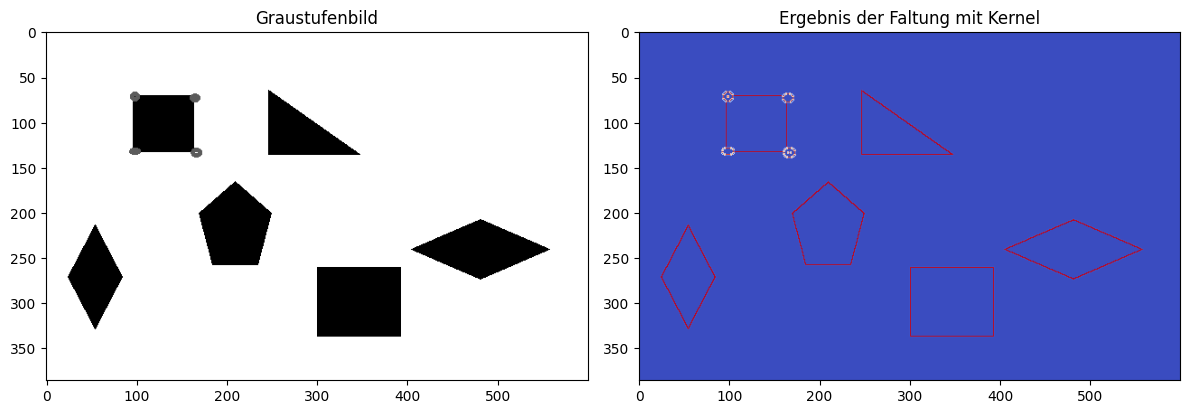

In [95]:
# Filter definieren
# Hier verwenden wir den klassischen 8-neighbourhood Laplace-Kernel
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])
# Filter anwenden
ergebnis = convolve(bild_array, kernel)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(bild_array, cmap='gray')
axs[0].set_title("Graustufenbild")

axs[1].imshow(ergebnis, cmap='coolwarm')
axs[1].set_title(f"Ergebnis der Faltung mit Kernel")

plt.tight_layout()
plt.show()

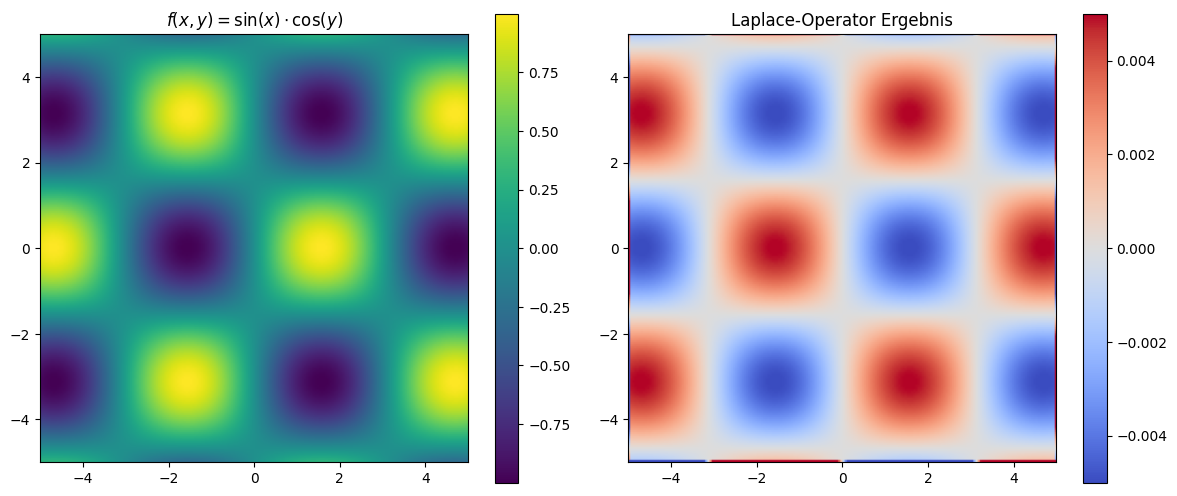

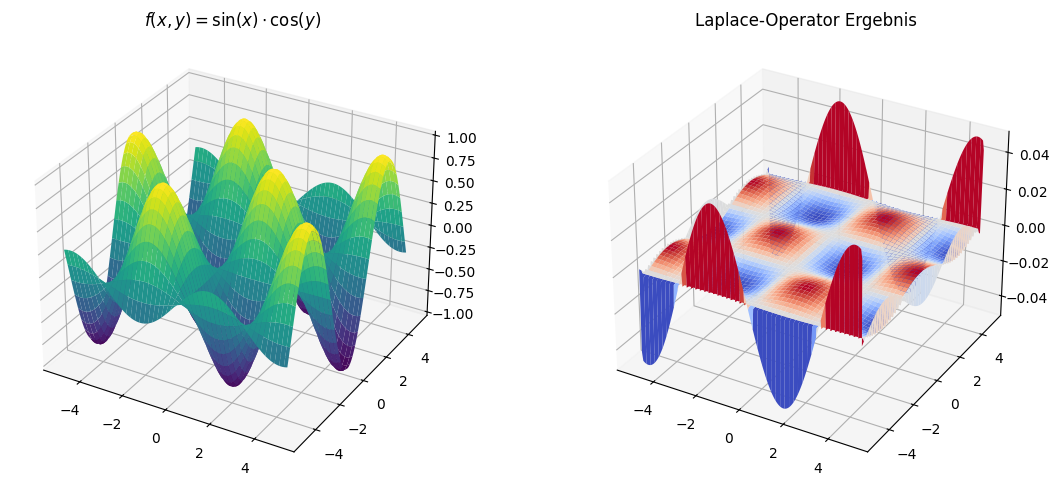

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace

# Gitter erzeugen
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

# Komplexere Funktion: Sinus-Cosinus-Kombination
Z = np.sin(X) * np.cos(Y)
#Z = np.array(bild) # auskommentieren f√ºr Beispiel: Graustufenbild als Funktion

# Laplace-Operator anwenden
laplace_Z = laplace(Z)

# Plotten
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Originalfunktion
im0 = axs[0].imshow(Z, extent=(-5, 5, -5, 5), origin='lower', cmap='viridis')
axs[0].set_title(r"$f(x,y) = \sin(x) \cdot \cos(y)$")
plt.colorbar(im0, ax=axs[0])

# Laplace-Operator Ergebnis
im1 = axs[1].imshow(laplace_Z, extent=(-5, 5, -5, 5), origin='lower', cmap='coolwarm', vmin=-0.005, vmax=0.005)
axs[1].set_title("Laplace-Operator Ergebnis")
plt.colorbar(im1, ax=axs[1])

plt.tight_layout()
plt.show()

# 3D-Plots
fig = plt.figure(figsize=(12, 5))

# Originalfunktion
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title(r"$f(x,y) = \sin(x) \cdot \cos(y)$")

# Ergebnis nach Laplace-Operator
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, laplace_Z, cmap='coolwarm', vmin=-0.005, vmax=0.005)
ax2.set_title("Laplace-Operator Ergebnis")

plt.tight_layout()
plt.show()

Was du erkennen solltest:

‚úÖ Die Laplace-Berechnung hebt besonders die Stellen hervor, an denen die Kr√ºmmung der Funktion wechselt.

‚úÖ Maxima erscheinen negativ, Minima positiv (je nach Konvention). ‚Üí Die zweite Ableitung von `sin(x)` ist `-sin(x)`

‚úÖ Die wellenartige Struktur bleibt im Laplace-Bild sichtbar, aber zeigt dort die ‚Äúzweite Ableitung‚Äù der Funktion.

‚úÖ Links siehst du die wellenartige Struktur der Sinus-Cosinus-Funktion.

‚úÖ Rechts siehst du, wie der Laplace-Operator die Kr√ºmmungsinformationen extrahiert. Maxima, Minima und Sattelstellen werden durch unterschiedliche Farben hervorgehoben.

**Warum sind die Minima/Maxima schwach?**
1.	Numerische Approximation:
Der scipy.ndimage.laplace Operator verwendet numerische Filter (finite differences), die am Rand st√§rkere Artefakte erzeugen. Die echten Kr√ºmmungen im Inneren erscheinen oft schw√§cher.

2.	Die Funktion selbst:
Bei einer Funktion wie sin(x) * cos(y) wechseln sich positive und negative Bereiche regelm√§√üig ab. An vielen Stellen kompensiert sich die Kr√ºmmung, weshalb der Laplace-Wert nahe Null bleibt. Die Extremwerte sind nur an bestimmten Punkten deutlich.

3.	Farbschema / Skalierung:
Standardm√§√üig skaliert plot_surface die Farbt√∂ne automatisch auf die Minimal- und Maximalwerte. Wenn die Werte im Inneren sehr nah an Null liegen und nur am Rand starke Ausschl√§ge vorhanden sind, erscheinen die inneren Unterschiede fast unsichtbar.

    ‚Üí angepasste Farbskala:     
    `ax2.plot_surface(X, Y, laplace_Z, cmap='coolwarm', vmin=-0.5, vmax=0.5)`

# Gaussian

### 1D Gaussian function

<a>
  <img src="../images/1D_gaussian_function.png" alt="Pinhole camera" width="500" style="background-color: white;padding: 10px;">
</a>

Anhand der 1D Gaussfunktion sollen die Effekte der einzelnen Parameter untersucht werden.

- $ A $ √§ndert die H√∂he

- $ \mu $ verschiebt den Ursprung

- $ \sigma $ ver√§ndert die Breite der Glocken/Gausskurve (Standarabweichung)


### 2D Gaussian function

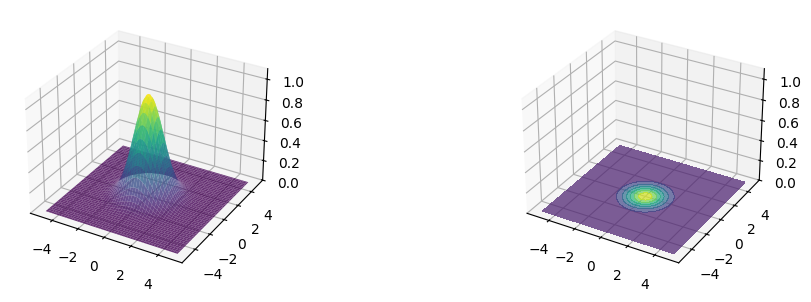

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
A = 1
x0, y0 = 0, 0
sigma_x = 1
sigma_y = 1

# Grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 2D Gaussian
Z = A * np.exp(-(((X - x0)**2) / (2 * sigma_x**2) + ((Y - y0)**2) / (2 * sigma_y**2)))

# Plot
fig = plt.figure(figsize=(12, 3))

# 3D Surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# 2D Contour projection auf die x-y-Ebene bei z=0
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap='viridis', alpha=0.7)

# Achsen
ax1.set_zlim(0, A*1.1)
ax2.set_zlim(0, A*1.1)
plt.tight_layout()
plt.show()

The 2D Gaussian function is given by: 
$$G(x, y) = A \cdot \exp\left( -\left( \frac{(x - x_0)^2}{2\sigma_x^2} + \frac{(y - y_0)^2}{2\sigma_y^2} \right) \right)$$

Where:
- $A$ = Amplitude (peak value)
- $(x_0, y_0)$ = Center of the Gaussian
- $\sigma_x, \sigma_y$ = Standard deviations in x and y direction

The Kernel is calculated by approximation. Imagine a 3x3 grid ranging x-values from [-1,0,1] and y-values from [-1,0,1]. 

For each coordinate $G(x_1,y_1)$ the gaussian value can be calculated. 

$$ \frac{1} {16} 
\cdot \begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
= 
\begin{bmatrix}
0.075 & 0.124 & 0.075 \\
0.124 & 0.204 & 0.124 \\
0.075 & 0.124 & 0.075
\end{bmatrix}
$$

For example with $A=1$, $\sigma=0,85$ and $(x_0, y_0)=(0,0)$: 
$$G(x=0,y=1)=1\cdot e^{-((\frac{(0-0)^2}{2\cdot 0.85^2})+(\frac{(1-0)^2}{2\cdot 0.85^2}))}=e^{-\frac{1}{2\cdot 0.85^2}}$$


 Wieso kann ich den Kernel nicht h√§ndisch ausrechnen?

In [119]:
import numpy as np

def gaussian(x, y, A=1, x0=0, y0=0, sigma=1):
    return A * np.exp(-(((x - x0)**2 + (y - y0)**2) / (2 * sigma**2)))

# Beispielwert
val = gaussian(0, 1)
print(f"G(0,1) = {val:.4f}")  # Erwartet: ca. 0.6065

G(0,1) = 0.6065


In [121]:
# 3x3 Kernel um (0,0) mit sigma=1
size = 1  # Radius
kernel = np.zeros((2*size+1, 2*size+1))
for i, x in enumerate(range(-size, size+1)):
    for j, y in enumerate(range(-size, size+1)):
        kernel[i, j] = gaussian(x, y)

# Kernel normalisieren
kernel /= np.sum(kernel)

print("3x3 Gaussian Kernel:")
print(kernel)

3x3 Gaussian Kernel:
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


In [123]:
import numpy as np

def gaussian_kernel(size=3, sigma=1.0, A=1.0, normalize=True):
    """
    Berechnet einen 2D-Gaussian Kernel.
    
    Args:
        size (int): Gr√∂√üe des Kernels (muss ungerade sein, z.B. 3, 5, 7)
        sigma (float): Standardabweichung der Gau√üfunktion
        A (float): Amplitude der Gau√üfunktion
        normalize (bool): Ob der Kernel normiert werden soll (Summe=1)
    
    Returns:
        np.ndarray: Gaussian Kernel
    """
    assert size % 2 == 1, "Kernelgr√∂√üe muss ungerade sein"
    ax = np.arange(-(size // 2), size // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)

    kernel = A * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    
    if normalize:
        kernel = kernel / np.sum(kernel)
    
    return kernel

# Beispiel
kernel = gaussian_kernel(size=3, sigma=1.0, A=1.0)
print("Gaussian Kernel (3x3) mit sigma=1.0, A=1.0:\n", kernel)
print("Summe Kernel:", np.sum(kernel))

Gaussian Kernel (3x3) mit sigma=1.0, A=1.0:
 [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
Summe Kernel: 0.9999999999999998


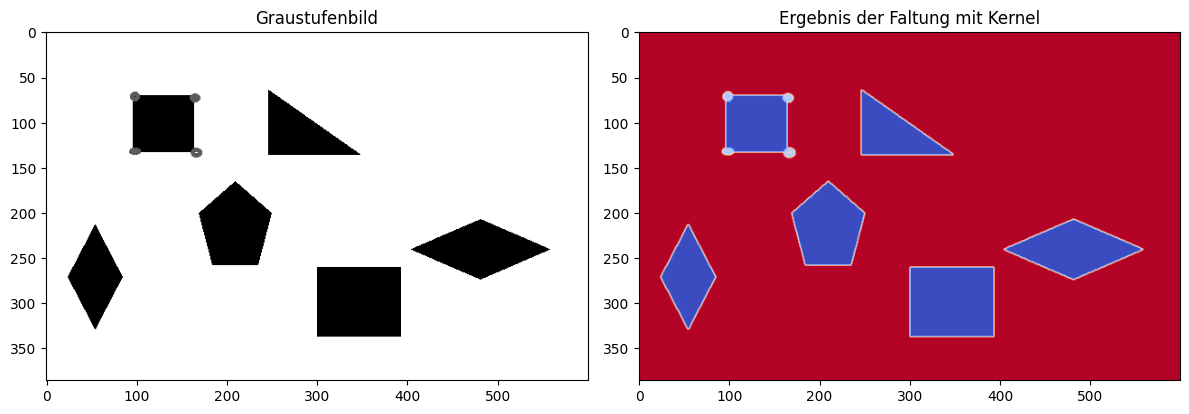

In [131]:
# Filter definieren
# Hier verwenden wir den 
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]])/ 16
# Filter anwenden
ergebnis = convolve(bild_array, kernel)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(bild_array, cmap='gray')
axs[0].set_title("Graustufenbild")

axs[1].imshow(ergebnis, cmap='coolwarm')
axs[1].set_title(f"Ergebnis der Faltung mit Kernel")

plt.tight_layout()
plt.show()

# Derivative of Gaussian

Die Derivative of Gaussian (DoG) ist die erste Ableitung der Gau√üfunktion und wird verwendet, um Kanten in Bildern zu detektieren, w√§hrend gleichzeitig Rauschen unterdr√ºckt wird. Sie kombiniert also Gl√§ttung (Gaussian) und Kantendetektion (Ableitung) in einem Schritt.

‚∏ª

üìå Mathematische Definition

Die 2D-Gau√üfunktion lautet:
$$G(x, y) = \frac{1}{2\pi\sigma^2} \cdot e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

Die erste Ableitung nach x (Partielle Ableitung):
$$\frac{\partial G(x, y)}{\partial x} = -\frac{x}{2\pi\sigma^4} \cdot e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

Analog nach y:
$$\frac{\partial G(x, y)}{\partial y} = -\frac{y}{2\pi\sigma^4} \cdot e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

Diese Ableitungen k√∂nnen als Filter-Kernel verwendet werden (√§hnlich wie Sobel, aber gegl√§ttet).

üí° Vorteil gegen√ºber Sobel:
- Sobel = einfache Ableitung + wenig Gl√§ttung
- DoG = mathematisch exakte Ableitung + anpassbare Gl√§ttung (√ºber œÉ)

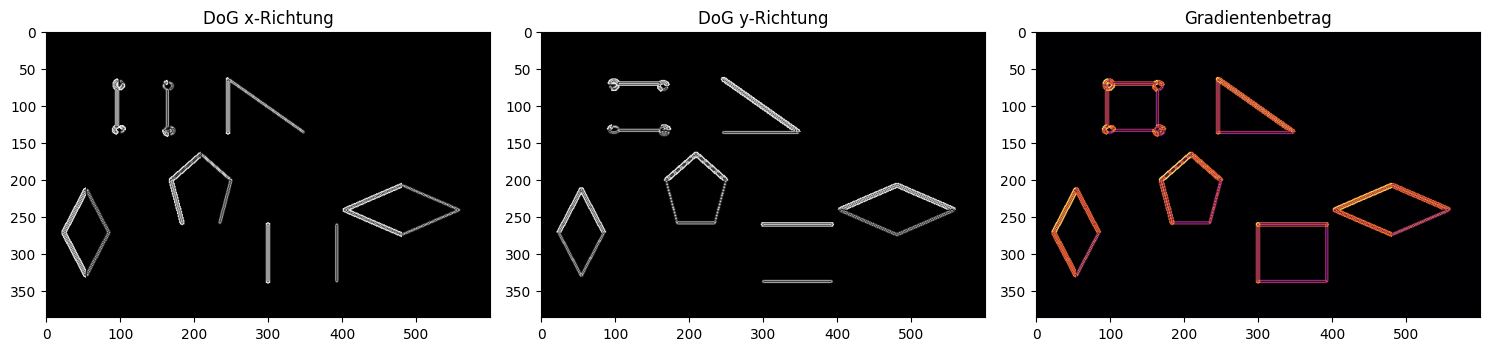

In [132]:
def derivative_of_gaussian(size=5, sigma=1.0, direction='x'):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)

    gauss = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    if direction == 'x':
        dog = -xx * gauss / (sigma**2)
    elif direction == 'y':
        dog = -yy * gauss / (sigma**2)
    else:
        raise ValueError("direction must be 'x' or 'y'")
    
    # Optional: normieren
    dog -= np.mean(dog)
    return dog

# DoG-Filter erzeugen
dog_x = derivative_of_gaussian(size=7, sigma=1.0, direction='x')
dog_y = derivative_of_gaussian(size=7, sigma=1.0, direction='y')

# Filter anwenden
gradient_x = convolve(bild_array, dog_x)
gradient_y = convolve(bild_array, dog_y)
magnitude = np.hypot(gradient_x, gradient_y)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(gradient_x, cmap='gray')
axs[0].set_title("DoG x-Richtung")
axs[1].imshow(gradient_y, cmap='gray')
axs[1].set_title("DoG y-Richtung")
axs[2].imshow(magnitude, cmap='inferno')
axs[2].set_title("Gradientenbetrag")
plt.tight_layout()
plt.show()

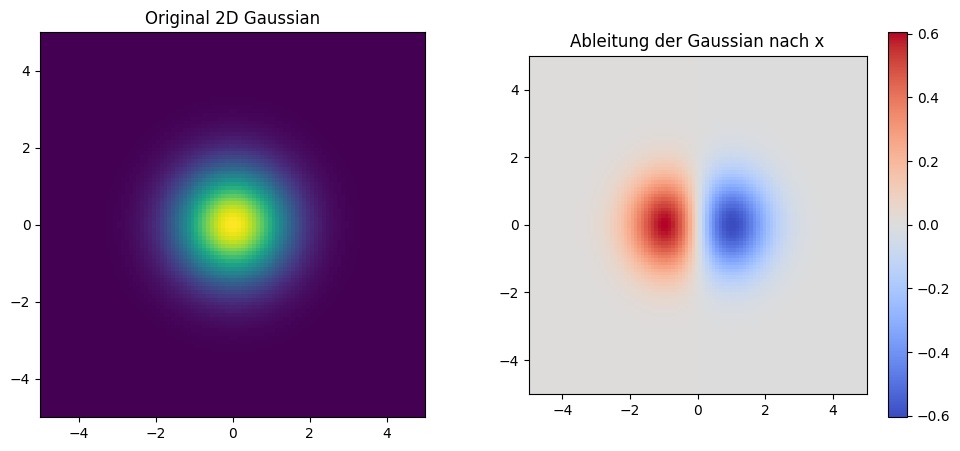

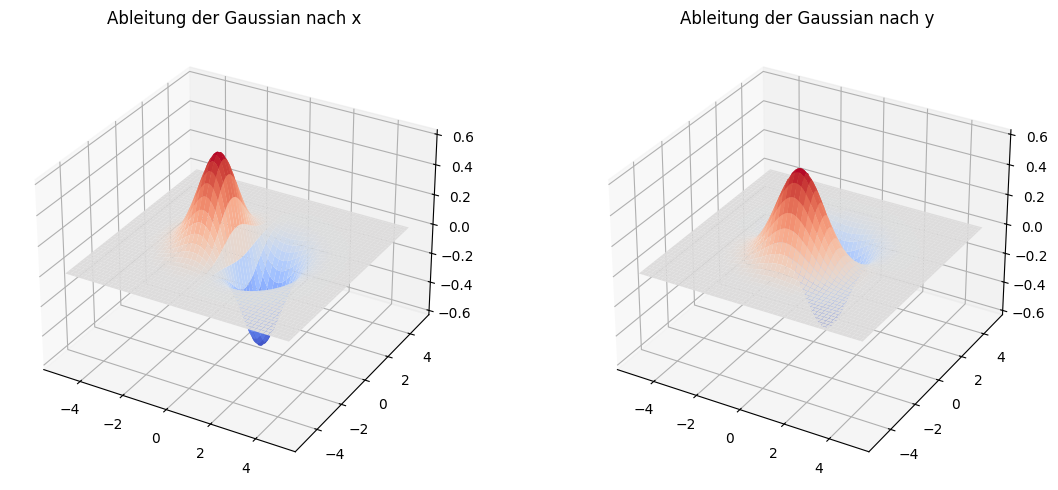

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
sigma = 1
A = 1

# Gitter erzeugen
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 2D Gaussian
Z = A * np.exp(- (X**2 + Y**2) / (2 * sigma**2))

# Ableitung der Gaussian nach x
dZ_dx = - (X / sigma**2) * Z
dZ_dy = - (Y / sigma**2) * Z

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Original Gaussian
axs[0].imshow(Z, extent=[-5,5,-5,5], origin='lower', cmap='viridis')
axs[0].set_title('Original 2D Gaussian')

# Ableitung nach x
im = axs[1].imshow(dZ_dx, extent=[-5,5,-5,5], origin='lower', cmap='coolwarm')
axs[1].set_title('Ableitung der Gaussian nach x')
plt.colorbar(im, ax=axs[1])
plt.show()

# 3D Plot
fig = plt.figure(figsize=(12, 5))

# 3D Surface Plot der Ableitung nach x
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, dZ_dx, cmap='coolwarm')
ax1.set_title("Ableitung der Gaussian nach x")

# 3D Surface Plot der Ableitung nach y
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, dZ_dy, cmap='coolwarm')
ax2.set_title("Ableitung der Gaussian nach y")

plt.tight_layout()
plt.show()

# LoG (Laplacian of Gaussian)

$$\text{LoG}(x, y) = \nabla^2 G(x, y)$$
= Laplace (zweite Ableitung) der Gau√üfunktion G(x, y)

LoG kombiniert zwei Dinge:
1.	Gl√§ttung mit einer Gau√üfunktion ‚Üí unterdr√ºckt Rauschen
2.	Kantendetektion durch den Laplace-Operator ‚Üí findet starke Helligkeits√§nderungen (zweite Ableitung)
    
‚Üí LoG detektiert Kanten robuster als der Laplace-Operator allein, da er vorher gl√§ttet!


**Herleitung (konzeptionell)**
1.	Die Gau√üfunktion ist:
$$G(x, y) = \frac{1}{2\pi\sigma^2} \cdot e^{-\frac{x^2 + y^2}{2\sigma^2}}$$
2.	Die Laplacian-Operator ist:
$$\nabla^2 G = \frac{\partial^2 G}{\partial x^2} + \frac{\partial^2 G}{\partial y^2}$$
3.	Das ergibt (abgeleitet!):
$$\nabla^2 G(x, y) = \left(\frac{x^2 + y^2 - 2\sigma^2}{\sigma^4}\right) \cdot G(x, y)$$

üîÅ Du wendest erst die Gau√ü-Gl√§ttung an, dann den Laplace-Filter ‚Äî oder nutzt direkt einen vordefinierten LoG-Kernel.

‚∏ª

üß™ Beispiel-Kernel (5√ó5, œÉ ‚âà 1.0):

$$\begin{bmatrix}
0 & 0 & -1 & 0 & 0 \\
0 & -1 & -2 & -1 & 0 \\
-1 & -2 & 16 & -2 & -1 \\
0 & -1 & -2 & -1 & 0 \\
0 & 0 & -1 & 0 & 0 \\
\end{bmatrix}$$

Der 3x3 LoG Kernel sieht genauso aus wie der 3x3 LaPlace Kernel. F√ºr echte LoG-Kernel braucht man typischerweise gr√∂√üere Gr√∂√üen (5x5 oder 7x7), da die Gau√ü-Gl√§ttung eine Verteilung mit mehreren Werten hat.

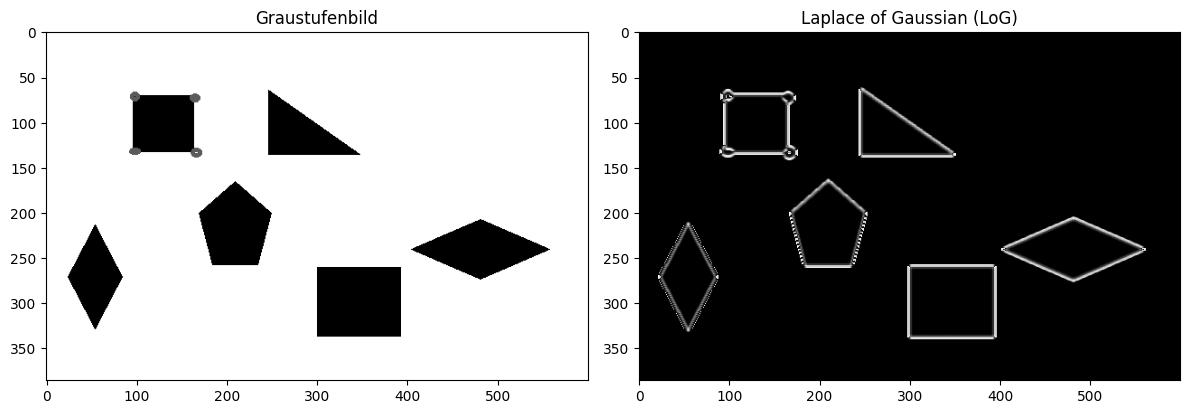

In [134]:
from scipy.ndimage import gaussian_laplace

log_bild = gaussian_laplace(bild_array, sigma=1.0)
# Plotten
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  
axs[0].imshow(bild_array, cmap='gray')
axs[0].set_title("Graustufenbild")
axs[1].imshow(log_bild, cmap='gray')
axs[1].set_title("Laplace of Gaussian (LoG)")
plt.tight_layout()
plt.show()

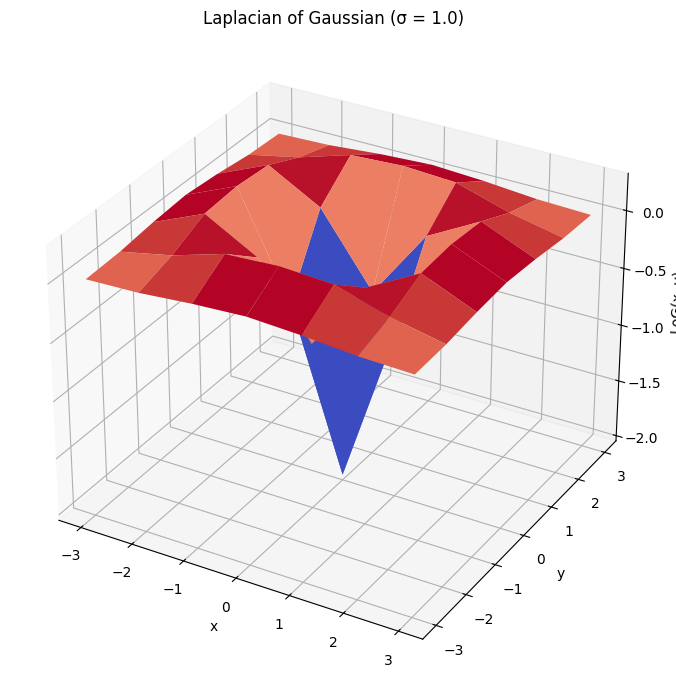

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def laplacian_of_gaussian(x, y, sigma):
    """Berechnet den LoG-Wert an Position (x, y) f√ºr gegebenes sigma"""
    r2 = x**2 + y**2
    factor = (r2 - 2 * sigma**2) / (sigma**4)
    gaussian = np.exp(-r2 / (2 * sigma**2))
    return factor * gaussian

# Parameter
sigma = 1.0
size = int(6 * sigma) + 1  # Kernelgr√∂√üe (symmetrisch um Null)
half_size = size // 2

# Gitter erstellen
x = np.linspace(-half_size, half_size, size)
y = np.linspace(-half_size, half_size, size)
X, Y = np.meshgrid(x, y)
Z = laplacian_of_gaussian(X, Y, sigma)

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_title(f"Laplacian of Gaussian (œÉ = {sigma})")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("LoG(x, y)")

plt.tight_layout()
plt.show()